In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-olympics-medals-since-1896/olympics_medals_country_wise.csv


In [3]:
df = pd.read_csv('/kaggle/input/countries-olympics-medals-since-1896/olympics_medals_country_wise.csv')
df.head(10)

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,(AUS),27,164,173,210,547,20,6,7,6,19,47,170,180,216,566
6,Austria,(AUT),28,20,35,41,96,24,71,88,91,250,52,91,123,132,346
7,Azerbaijan,(AZE),7,7,14,28,49,7,0,0,0,0,14,7,14,28,49
8,Bahamas,(BAH),17,8,2,6,16,0,0,0,0,0,17,8,2,6,16
9,Bahrain,(BRN),10,2,2,0,4,0,0,0,0,0,10,2,2,0,4


**SIZE OF DATA-FRAME**

In [4]:
df.shape

(156, 17)

In [5]:
df.columns

Index(['countries ', 'ioc_code ', 'summer_participations', 'summer_gold',
       'summer_silver', 'summer_bronze', 'summer_total',
       'winter_participations', 'winter_gold', 'winter_silver',
       'winter_bronze', 'winter_total', 'total_participation', 'total_gold',
       'total_silver', 'total_bronze', 'total_total '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   countries              156 non-null    object
 1   ioc_code               156 non-null    object
 2   summer_participations  156 non-null    int64 
 3   summer_gold            156 non-null    object
 4   summer_silver          156 non-null    int64 
 5   summer_bronze          156 non-null    int64 
 6   summer_total           156 non-null    object
 7   winter_participations  156 non-null    int64 
 8   winter_gold            156 non-null    int64 
 9   winter_silver          156 non-null    int64 
 10  winter_bronze          156 non-null    int64 
 11  winter_total           156 non-null    int64 
 12  total_participation    156 non-null    int64 
 13  total_gold             156 non-null    object
 14  total_silver           156 non-null    int64 
 15  total_bronze           

**Checking for null values in columns**

In [7]:
df.isnull().sum()

countries                0
ioc_code                 0
summer_participations    0
summer_gold              0
summer_silver            0
summer_bronze            0
summer_total             0
winter_participations    0
winter_gold              0
winter_silver            0
winter_bronze            0
winter_total             0
total_participation      0
total_gold               0
total_silver             0
total_bronze             0
total_total              0
dtype: int64

**Deleting duplicate rows**

In [8]:
len(df)

156

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.columns.tolist())
df['countries ']

['countries ', 'ioc_code ', 'summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_bronze', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_bronze', 'total_total ']


0                            Afghanistan
1                                Algeria
2                              Argentina
3                                Armenia
4                            Australasia
                     ...                
151                               Zambia
152                             Zimbabwe
153         Independent Olympic Athletes
154    Independent Olympic Participants 
155                          Mixed Team 
Name: countries , Length: 156, dtype: object

In [69]:
df=df.rename(columns={'countries ':'countries','ioc_code ':'ioc_code','total_total':'total_total' })

In [70]:
print(df.columns.tolist())

['countries', 'ioc_code', 'summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_bronze', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_bronze', 'total_total ']


In [71]:
df['countries']

0                            Afghanistan
1                                Algeria
2                              Argentina
3                                Armenia
4                            Australasia
                     ...                
151                               Zambia
152                             Zimbabwe
153         Independent Olympic Athletes
154    Independent Olympic Participants 
155                          Mixed Team 
Name: countries, Length: 156, dtype: object

In [72]:
len(df)

156

**Cleaning the individual columns**

In [15]:
df['ioc_code'].unique()

array(['(AFG)', '(ALG)', '(ARG)', '(ARM)', '(ANZ)', '(AUS)', '(AUT)',
       '(AZE)', '(BAH)', '(BRN)', '(BAR)', '(BLR)', '(BEL)', '(BER)',
       '(BOH)', '(BOT)', '(BRA)', '(BWI)', '(BUL)', '(BUR)', '(BDI)',
       '(CMR)', '(CAN)', '(CHI)', '(CHN)', '(COL)', '(CRC)', '(CIV)',
       '(CRO)', '(CUB)', '(CYP)', '(CZE)', '(TCH)', '(DEN)', '(DJI)',
       '(DOM)', '(ECU)', '(EGY)', '(ERI)', '(EST)', '(ETH)', '(FIJ)',
       '(FIN)', '(FRA)', '(GAB)', '(GEO)', '(GER)', '(EUA)', '(GDR)',
       '(FRG)', '(GHA)', '(GBR)', '(GRE)', '(GRN)', '(GUA)', '(GUY)',
       '(HAI)', '(HKG)', '(HUN)', '(ISL)', '(IND)', '(INA)', '(IRI)',
       '(IRQ)', '(IRL)', '(ISR)', '(ITA)', '(JAM)', '(JPN)', '(JOR)',
       '(KAZ)', '(KEN)', '(KOS)', '(PRK)', '(KOR)', '(KUW)', '(KGZ)',
       '(LAT)', '(LBN)', '(LIE)', '(LTU)', '(LUX)', '(MAS)', '(MRI)',
       '(MEX)', '(MDA)', '(MGL)', '(MNE)', '(MAR)', '(MOZ)', '(NAM)',
       '(NED)', '(AHO)', '(NZL)', '(NIG)', '(NGR)', '(MKD)', '(NOR)',
       '(PAK)', '(PA

In [16]:
df['summer_participations'].unique()

array([15, 14, 25,  7,  2, 27, 28, 17, 10, 13, 19,  3, 11, 23,  1, 21, 24,
       20, 16,  8,  9,  6, 26, 29,  5, 18, 22, 12,  4,  0])

In [17]:
df['summer_gold'].unique()

array(['0', '5', '21', '2', '3', '164', '20', '7', '8', '13', '44', '1',
       '37', '54', '71', '262', '14', '84', '19', '49', '48', '10', '23',
       '101', '223', '201', '28', '153', '56', '284', '35', '181', '24',
       '11', '217', '26', '169', '16', '96', '4', '6', '95', '53', '62',
       '72', '90', '148', '395', '45', '27', '41', '1,060'], dtype=object)

In [18]:
df['summer_gold']=df['summer_gold'].str.replace(",","")

In [19]:
df['summer_gold'].unique()

array(['0', '5', '21', '2', '3', '164', '20', '7', '8', '13', '44', '1',
       '37', '54', '71', '262', '14', '84', '19', '49', '48', '10', '23',
       '101', '223', '201', '28', '153', '56', '284', '35', '181', '24',
       '11', '217', '26', '169', '16', '96', '4', '6', '95', '53', '62',
       '72', '90', '148', '395', '45', '27', '41', '1060'], dtype=object)

In [20]:
df['summer_silver'].unique()

array([  0,   4,  26,   8, 173,  35,  14,   2,  30,  56,   1,  42,  88,
       109,   7, 199,  13,  69,  21,  49,  78,   5,  11,   9,  12,  85,
       251, 207,  54, 129,  67, 318,  45,   3, 154,  23,  10, 188,  36,
       150,  22,  16,  91,  24, 105,  33,  51,  89,  97, 126, 319,  38,
        28,  72, 176,  79, 831,   6,  29])

In [21]:
df['summer_bronze'].unique()

array([  2,   8,  30,   5, 210,  41,  28,   6,   0,   1,  42,  57,   3,
        71,  82, 146,   4, 173,  16,  14,  27,  45,  79,  19,  17,  23,
       119, 277,  18, 247,  36, 127,  81, 314, 176,  15,  29,   9, 213,
        25, 178,  35, 100,  13,  12, 122,  51,  50, 137, 121, 151, 296,
        11,  49, 179,  74,   7,  37,  68, 738,  20])

In [22]:
df['summer_total'].unique()

array(['2', '17', '77', '18', '12', '547', '96', '49', '16', '4', '1',
       '85', '157', '150', '224', '6', '326', '13', '634', '34', '41',
       '235', '67', '143', '205', '5', '38', '36', '58', '3', '305',
       '751', '40', '655', '118', '409', '204', '916', '121', '9', '511',
       '35', '37', '76', '618', '87', '497', '71', '113', '55', '287',
       '7', '21', '0', '26', '72', '30', '24', '322', '137', '27', '163',
       '10', '14', '298', '28', '8', '308', '425', '1,010', '112', '32',
       '89', '169', '503', '206', '19', '15', '104', '11', '139', '2,629',
       '83', '25'], dtype=object)

In [23]:
df['summer_total']=df['summer_total'].str.replace(",","")

In [24]:
df['summer_total'].unique()

array(['2', '17', '77', '18', '12', '547', '96', '49', '16', '4', '1',
       '85', '157', '150', '224', '6', '326', '13', '634', '34', '41',
       '235', '67', '143', '205', '5', '38', '36', '58', '3', '305',
       '751', '40', '655', '118', '409', '204', '916', '121', '9', '511',
       '35', '37', '76', '618', '87', '497', '71', '113', '55', '287',
       '7', '21', '0', '26', '72', '30', '24', '322', '137', '27', '163',
       '10', '14', '298', '28', '8', '308', '425', '1010', '112', '32',
       '89', '169', '503', '206', '19', '15', '104', '11', '139', '2629',
       '83', '25'], dtype=object)

In [25]:
df['winter_gold'].unique()

array([  0,   6,  71,   8,   2,   1,  77,  22,   4,  10,  45,  41, 104,
        39,  11,  12,  42,  17,  33,  53, 148,   7,  47,  78,   9,  65,
        63,   3, 113])

**DATA VISUALIZATION**

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 640x480 with 0 Axes>

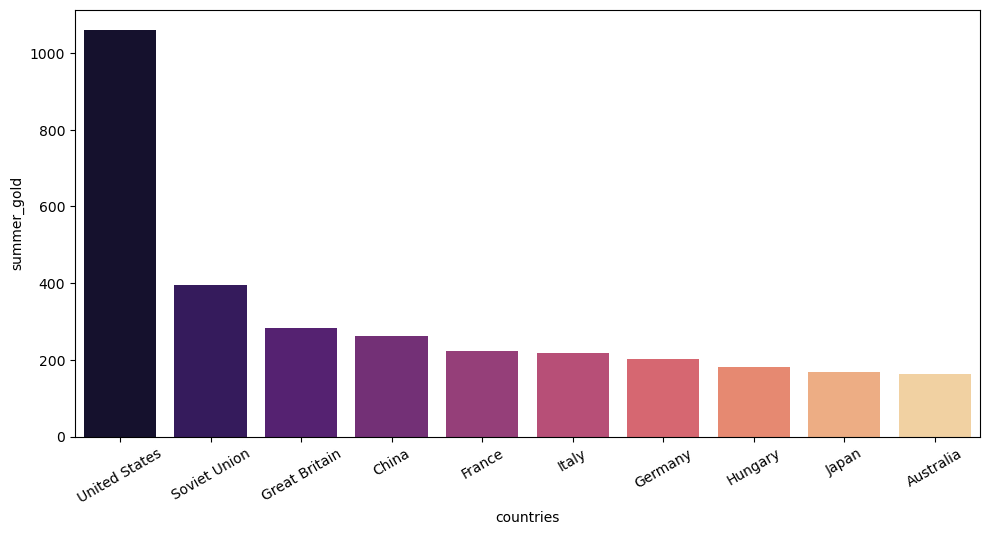

In [27]:
#Summer_gold = df.loc[:,['countries','summer_gold']]
Summer_gold = df.groupby('countries')['summer_gold'].sum()
Summer_gold = Summer_gold.to_frame()
#Summer_gold = Summer_gold.sort_values("summer_gold",ascending=False)
#display(Summer_gold.head())

fig=plt.figure()
fig, axes=plt.subplots(nrows=1, ncols=1,figsize=(10,5))

a = df.groupby('countries')[['summer_gold']].mean().nlargest(10,['summer_gold']).reset_index()
sns.barplot(data=a,x='countries',y='summer_gold',palette='magma')
fig.tight_layout()
plt.xticks(rotation=30)
plt.show()

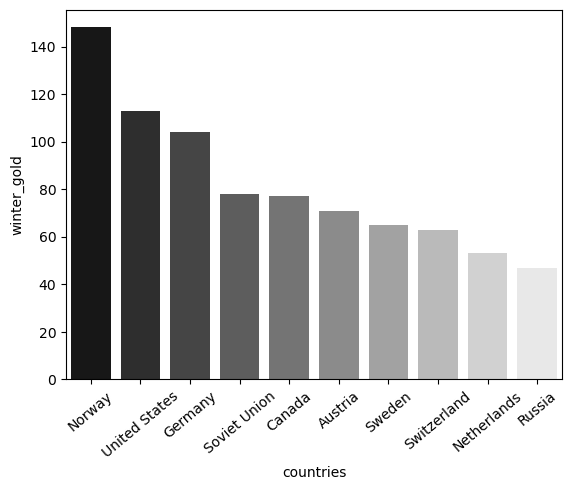

In [31]:
a = df.groupby('countries')[['winter_gold']].mean().nlargest(10,['winter_gold']).reset_index()
sns.barplot(data=a,x='countries',y='winter_gold',palette='gray')
plt.xticks(rotation=40)
plt.show()



In [32]:
df.head(1)

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2


In [36]:
df['total_gold'].unique()

array(['0', '5', '21', '2', '3', '170', '91', '7', '8', '46', '1', '37',
       '55', '148', '284', '18', '84', '29', '51', '48', '14', '23',
       '146', '264', '10', '305', '36', '192', '67', '296', '35', '183',
       '24', '11', '259', '26', '186', '15', '16', '129', '6', '13',
       '210', '79', '90', '195', '473', '54', '12', '27', '49', '213',
       '116', '41', '4', '38', '1,173'], dtype=object)

In [37]:
df['total_gold']=df['total_gold'].str.replace(",","")

In [38]:
df['total_gold'].unique()

array(['0', '5', '21', '2', '3', '170', '91', '7', '8', '46', '1', '37',
       '55', '148', '284', '18', '84', '29', '51', '48', '14', '23',
       '146', '264', '10', '305', '36', '192', '67', '296', '35', '183',
       '24', '11', '259', '26', '186', '15', '16', '129', '6', '13',
       '210', '79', '90', '195', '473', '54', '12', '27', '49', '213',
       '116', '41', '4', '38', '1173'], dtype=object)

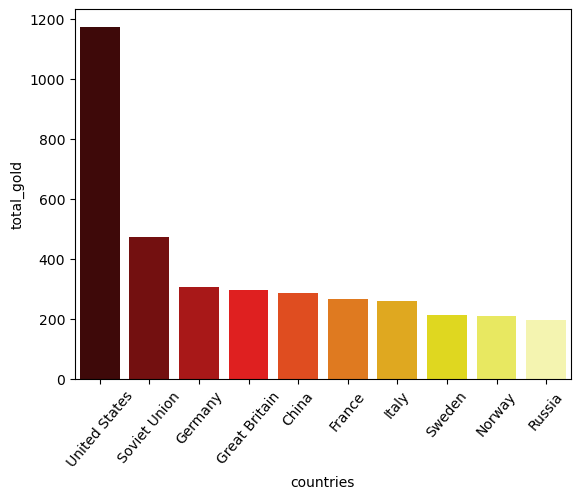

In [44]:
a = df.groupby('countries')[['total_gold']].mean().nlargest(10,['total_gold']).reset_index()
sns.barplot(x='countries',y='total_gold',data=a,palette='hot')
plt.xticks(rotation=50)
plt.show()

In [45]:
df['winter_gold'].unique()

array([  0,   6,  71,   8,   2,   1,  77,  22,   4,  10,  45,  41, 104,
        39,  11,  12,  42,  17,  33,  53, 148,   7,  47,  78,   9,  65,
        63,   3, 113])

In [53]:
df['total_silver'].unique()

array([  0,   4,  26,   8, 180, 123,  14,   2,  37,  58,   1,  42,  90,
       181,   7, 231,  13,  19,  69,  32,  57,  79,   5,  11,  12, 150,
       293, 305,  60, 165,  82, 323,  45,   3, 156,   9,  23,  10,  36,
       178,  25,  17, 121,  24, 154,  35, 184,  96,  97, 376,  44,   6,
        40,  18,  33,  73, 227, 126,  38, 953])

In [54]:
df['total_bronze'].unique()

array([  2,   8,  30,   5, 216, 132,  28,   6,   0,   1,  47,  61,   3,
        71,  85, 222,   4, 196,  16,  15,  82,  40,  60,  79,  19,  23,
       184, 332,  18, 312,  41, 162,  94, 331, 182,  29,  14,   9, 269,
        25, 209,  39,  36,  24, 116,  12,  13,  35,  17, 167,  53, 174,
       146, 122, 186, 355,  37,  11,  10,  52, 239,   7,  72, 833,  20])

In [65]:
df.head(10)

,countries,ioc_code,summer_participations,summer_gold,summer_silver,summer_bronze,summer_total,winter_participations,winter_gold,winter_silver,winter_bronze,winter_total,total_participation,total_gold,total_silver,total_bronze,total_total
0,Afghanistan,(AFG),15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,(ALG),14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,(ARG),25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,(ARM),7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,(ANZ),2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,(AUS),27,164,173,210,547,20,6,7,6,19,47,170,180,216,566
6,Austria,(AUT),28,20,35,41,96,24,71,88,91,250,52,91,123,132,346
7,Azerbaijan,(AZE),7,7,14,28,49,7,0,0,0,0,14,7,14,28,49
8,Bahamas,(BAH),17,8,2,6,16,0,0,0,0,0,17,8,2,6,16
9,Bahrain,(BRN),10,2,2,0,4,0,0,0,0,0,10,2,2,0,4


In [75]:
df['total_total '].unique()

array(['2', '17', '77', '18', '12', '566', '346', '49', '16', '4', '1',
       '105', '165', '150', '230', '6', '551', '13', '711', '34', '52',
       '235', '101', '168', '206', '5', '38', '44', '58', '3', '480',
       '889', '40', '922', '137', '519', '243', '950', '121', '9', '521',
       '35', '37', '76', '759', '87', '573', '79', '113', '57', '366',
       '7', '31', '10', '26', '72', '30', '24', '469', '143', '27', '568',
       '14', '321', '28', '8', '309', '546', '1,204', '135', '103', '42',
       '89', '174', '679', '374', '36', '19', '15', '104', '11', '148',
       '2,959', '25'], dtype=object)

In [76]:
df['total_total '] = df['total_total '].str.replace(",","")


In [77]:
df['total_total '].unique()

array(['2', '17', '77', '18', '12', '566', '346', '49', '16', '4', '1',
       '105', '165', '150', '230', '6', '551', '13', '711', '34', '52',
       '235', '101', '168', '206', '5', '38', '44', '58', '3', '480',
       '889', '40', '922', '137', '519', '243', '950', '121', '9', '521',
       '35', '37', '76', '759', '87', '573', '79', '113', '57', '366',
       '7', '31', '10', '26', '72', '30', '24', '469', '143', '27', '568',
       '14', '321', '28', '8', '309', '546', '1204', '135', '103', '42',
       '89', '174', '679', '374', '36', '19', '15', '104', '11', '148',
       '2959', '25'], dtype=object)

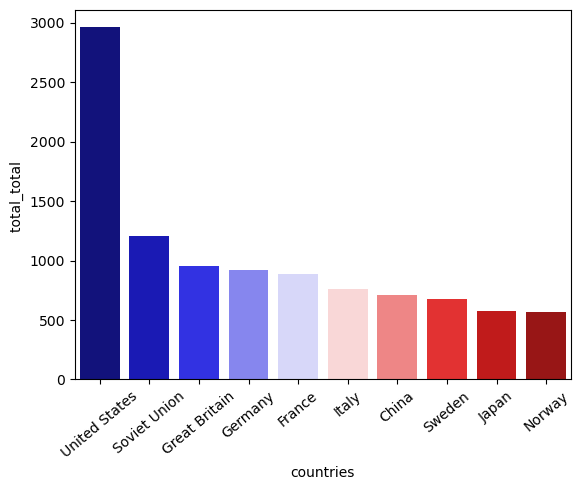

In [78]:
r = df.groupby('countries')[['total_total ']].mean().nlargest(10,['total_total ']).reset_index()
sns.barplot(x='countries',y='total_total ',data=r,palette='seismic')
plt.xticks(rotation=40)
plt.show()